# Bitly Data Analysis Example

In [40]:
import pandas as pd
import json
import seaborn as sns
import numpy as np

In [8]:
path = "data/bitly.txt"
records = [json.loads(line) for line in open(path)]

In [9]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [10]:
df = pd.DataFrame(records)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [14]:
df['tz'].head(20)

0        America/New_York
1          America/Denver
2        America/New_York
3       America/Sao_Paulo
4        America/New_York
5        America/New_York
6           Europe/Warsaw
7                        
8                        
9                        
10    America/Los_Angeles
11       America/New_York
12       America/New_York
13                    NaN
14       America/New_York
15         Asia/Hong_Kong
16         Asia/Hong_Kong
17       America/New_York
18         America/Denver
19            Europe/Rome
Name: tz, dtype: object

In [15]:
tz_counts = df['tz'].value_counts()

In [18]:
tz_counts.head(10)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [20]:
clean_tz = df['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

In [21]:
tz_counts = clean_tz.value_counts()

In [22]:
tz_counts.head(10)

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

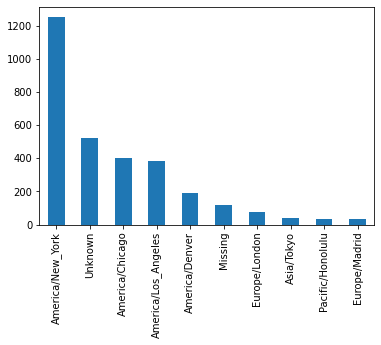

In [24]:
tz_counts.head(10).plot(kind='bar');

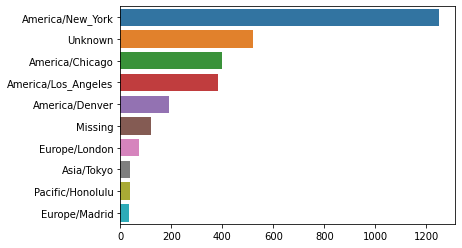

In [27]:
subset = tz_counts.head(10)
sns.barplot(y=subset.index, x=subset.values);

In [29]:
df['a'][1]

'GoogleMaps/RochesterNY'

In [32]:
res = pd.Series([x.split()[0] for x in df['a'].dropna()])

In [34]:
res.head(10)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

In [35]:
res.value_counts(10)

Mozilla/5.0                                          0.754070
Mozilla/4.0                                          0.174709
GoogleMaps/RochesterNY                               0.035174
Opera/9.80                                           0.009884
TEST_INTERNET_AGENT                                  0.006977
GoogleProducer                                       0.006105
Mozilla/6.0                                          0.001453
BlackBerry8520/5.0.0.681                             0.001163
BlackBerry8520/5.0.0.592                             0.000872
Dalvik/1.4.0                                         0.000872
Goldfire                                             0.000581
Socialite/7766                                       0.000581
BlackBerry9630/5.0.0.975                             0.000581
Acoon                                                0.000581
Nokia6790s-1b/ATT.03.22                              0.000291
ICE                                                  0.000291
Opera/9.

In [36]:
df_2 = df[df['a'].notnull()]

In [38]:
df['a'].head(100)

0     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                GoogleMaps/RochesterNY
2     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3     Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
                            ...                        
95    Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...
96    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
97    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3)...
98    Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...
99    Mozilla/5.0 (iPad; U; CPU OS 4_3_3 like Mac OS...
Name: a, Length: 100, dtype: object

In [41]:
df_2['os'] = np.where(df_2['a'].str.contains('Windows'), 'Windows', 'Non-Windows')

<ipython-input-41-7b5287a093a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['os'] = np.where(df_2['a'].str.contains('Windows'), 'Windows', 'Non-Windows')


In [42]:
df_2['os'].head()

0        Windows
1    Non-Windows
2        Windows
3    Non-Windows
4        Windows
Name: os, dtype: object

In [43]:
by_tz_os = df_2.groupby(['tz', 'os'])

In [45]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [46]:
agg_counts.head(10)

os,Non-Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [47]:
indexer = agg_counts.sum(1).argsort()

In [48]:
indexer

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

In [55]:
count_sub = agg_counts.take(indexer[-10:])

In [50]:
count_sub.head()

os,Non-Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0


In [51]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [58]:
count_sub = count_sub.stack()

In [60]:
count_sub.name='total'

In [61]:
count_sub.head()

tz                 os         
America/Sao_Paulo  Non-Windows    13.0
                   Windows        20.0
Europe/Madrid      Non-Windows    16.0
                   Windows        19.0
Pacific/Honolulu   Non-Windows     0.0
Name: total, dtype: float64

In [65]:
count_sub = count_sub.reset_index()

In [66]:
count_sub

,tz,os,total
0,America/Sao_Paulo,Non-Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Non-Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Non-Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Non-Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Non-Windows,43.0
9,Europe/London,Windows,31.0


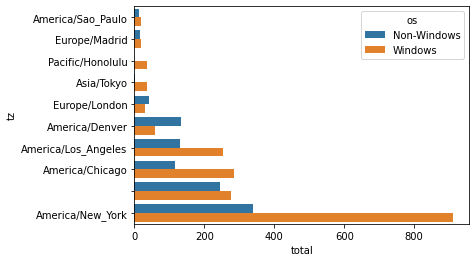

In [68]:
sns.barplot(x='total', y='tz', hue='os', data=count_sub);

In [69]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group


In [70]:
res = count_sub.groupby('tz').apply(norm_total)

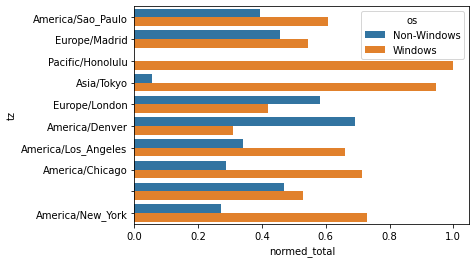

In [72]:
sns.barplot(x="normed_total", y="tz", hue="os", data=res);